<a href="https://colab.research.google.com/github/yuziny/Data-Analysis/blob/main/1_%EA%B5%AC%EB%B3%84_%EB%B2%84%EC%8A%A4%EC%A0%95%EB%A5%98%EC%9E%A5_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#서울시 생활정보 기반 대중교통 수요 분석

버스 노선 추가가 필요한 서울시 내 자치구 선정

1. 버스정류장 분석

In [1]:
!pip install pandas seaborn

데이터

- 1.1 bus_station_boarding.csv

- 서울시 버스노선별 정류장별 승하차 인원 정보

- https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do

- 1.1 bus_station_seoul.csv

- 서울시 버스정류장 위치정보

- https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do


In [2]:
import sys
import numpy as np
import pandas as pd

In [3]:
bus_station = pd.read_csv('/content/drive/MyDrive/포트폴리오/1.1 bus_station_boarding.csv', sep=',', encoding='cp949')
bus_station.shape

(1169878, 8)

In [4]:
bus_station_copy = bus_station.copy()

기본 정보 확인

In [5]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [6]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


In [7]:
# 버스정류장ARS번호는 정류소 위치
# object
# 정류소 코드(ARS-ID)는 5자리고, 1234처럼 4자리인 경우 앞에 0을 첨부하여 01234로 사용하기 때문
# 따라서 int64가 아닌 object로 사용해야함

In [8]:
 bus_station.버스정류장ARS번호.unique()

array(['06243', '06242', '06238', ..., '12241', '12242', '20965'],
      dtype=object)

버스정류장 위치를 구 별로 구분

In [9]:
bus_station.loc[:,['버스정류장ARS번호']]

,버스정류장ARS번호
0,06243
1,06242
2,06238
3,06309
4,11428
...,...
1169873,12004
1169874,06278
1169875,16555
1169876,25236


In [10]:
bus_station['자치구'] = bus_station['버스정류장ARS번호'].str[:2]
bus_station['자치구']

0          06
1          06
2          06
3          06
4          11
           ..
1169873    12
1169874    06
1169875    16
1169876    25
1169877    06
Name: 자치구, Length: 1169878, dtype: object

In [11]:
bus_station.자치구.unique()

array(['06', '11', '09', '01', '14', '13', '04', '22', '38', '20', '21',
       '19', '18', '03', '02', '08', '17', '05', '10', '35', '12', '07',
       '68', '16', '~', '42', '49', '39', '15', '23', '44', '25', '24',
       '48', '36', '40', '57', '56', '28', '61', '63', '46', '45', '31',
       '30', '37', '60', '27', '47', '59'], dtype=object)

서울시 자치구에 해당하는 버스정류장만 추출

- 서울시 구별 코드 정보는 01~25
- '01': '종로구', '02': '중구', '03': '용산구', '04': '성동구', '05': '광진구', '06': '동대문구', '07': '중랑구', '08': '성북구', '09': '강북구', '10': '도봉구', '11': '노원구', '12': '은평구', '13': '서대문구', '14': '마포구', '15': '양천구', '16': '강서구', '17': '구로구', '18': '금천구', '19': '영등포구', '20': '동작구', '21': '관악구', '22': '서초구', '23': '강남구', '24': '송파구', '25': '강동구'

In [12]:
seoul_code = {
    '01': '종로구', '02': '중구', '03': '용산구', '04': '성동구', '05': '광진구',
    '06': '동대문구', '07': '중랑구', '08': '성북구', '09': '강북구', '10': '도봉구',
    '11': '노원구', '12': '은평구', '13': '서대문구', '14': '마포구', '15': '양천구',
    '16': '강서구', '17': '구로구', '18': '금천구', '19': '영등포구', '20': '동작구',
    '21': '관악구', '22': '서초구', '23': '강남구', '24': '송파구', '25': '강동구'
}

bus_station['자치구'] = bus_station['자치구'].replace(seoul_code)

In [13]:
#'자치구' 열을 문자열로 변환한 후, 각 값이 숫자로만 이루어져 있는지를 확인
bus_station['자치구'].astype(str).str.isnumeric()

0          False
1          False
2          False
3          False
4          False
           ...  
1169873    False
1169874    False
1169875    False
1169876    False
1169877    False
Name: 자치구, Length: 1169878, dtype: bool

In [14]:
#'~'인 모든 행을 찾아 그 값을 'na'로 변경
#'자치구' 열에서 숫자로만 이루어진 모든 값을 'na'로 변경
bus_station.loc[bus_station['자치구'] == '~', '자치구'] = 'na'
bus_station.loc[bus_station['자치구'].astype(str).str.isnumeric(), '자치구'] = 'na'

In [15]:
bus_station['자치구'] = bus_station['자치구'].replace('na', np.nan)

In [16]:
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구
...,...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503,은평구
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503,동대문구
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,강서구
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,강동구


In [17]:
bus_station.자치구.unique()

array(['동대문구', '노원구', '강북구', '종로구', '마포구', '서대문구', '성동구', '서초구', nan,
       '동작구', '관악구', '영등포구', '금천구', '용산구', '중구', '성북구', '구로구', '광진구',
       '도봉구', '은평구', '중랑구', '강서구', '양천구', '강남구', '강동구', '송파구'],
      dtype=object)

결측치 처리

In [18]:
# NaN값 제거
# NaN값이 없는 경우는 자치구 명으로 변환되지 않은 행을 제거

# 1169878 rows × 9 columns
bus_station.dropna(axis=0, inplace=True)

In [19]:
# 1064594 rows × 9 columns
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구
...,...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503,은평구
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503,동대문구
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,강서구
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,강동구


버스 정류장의 위치가 서울시인지 확인

In [20]:
# 자치구별 정류장 개수 확인
bus_station.groupby('자치구', as_index=False)['버스정류장ARS번호'].nunique()

,자치구,버스정류장ARS번호
0,강남구,506
1,강동구,373
2,강북구,413
3,강서구,566
4,관악구,468
5,광진구,272
6,구로구,486
7,금천구,345
8,노원구,515
9,도봉구,361


In [21]:
# 강남구에서 랜덤으로 몇 개 골라 해당 자치구의 정류장이 맞는지 확인
bus_station[bus_station['자치구'] == '강남구']['버스정류장ARS번호']

897        23783
904        23081
905        23074
923        23062
1020       23045
           ...  
1169835    23223
1169842    23216
1169850    23189
1169861    23290
1169865    23187
Name: 버스정류장ARS번호, Length: 62571, dtype: object

강남구 정류장 중 하나인 23081 정류장을 네이버 지도에서 검색해보면 남양주에 위치

In [22]:
only_seoul = pd.read_csv('/content/drive/MyDrive/포트폴리오/1.2 bus_station_seoul.csv')
print(only_seoul)

       ARS-ID           정류소명
0        1001        종로2가사거리
1        1002    창경궁.서울대학교병원
2        1003      명륜3가.성대입구
3        1004       종로2가.삼일교
4        1005  혜화동로터리.여운형활동터
...       ...            ...
10930   25995          우성아파트
10931   25996          우성아파트
10932   25997           조일약국
10933   25998           성내시장
10934   25999    천호우체국.로데오거리

[10935 rows x 2 columns]


In [23]:
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [24]:
# 23081정류장이 only_seoul에 있는지 확인
only_seoul[only_seoul['ARS-ID'] == 23081]


,ARS-ID,정류소명


In [25]:
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)

In [26]:
only_seoul.rename(columns={'ARS-ID' : '버스정류장ARS번호'}, inplace=True)
only_seoul

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
10930,25995,우성아파트
10931,25996,우성아파트
10932,25997,조일약국
10933,25998,성내시장


In [27]:
seoul_bus_station = pd.merge(bus_station, only_seoul)

In [28]:
seoul_bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,정류소명
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구,장안동삼성쉐르빌아파트
1,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,75,197,20220404,동대문구,장안동삼성쉐르빌아파트
2,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,21,245,20220404,동대문구,장안동삼성쉐르빌아파트
3,20220401,2416,2416번(중랑공영차고지~삼성역),6243,장안동삼성쉐르빌아파트,42,268,20220404,동대문구,장안동삼성쉐르빌아파트
4,20220402,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,12,127,20220405,동대문구,장안동삼성쉐르빌아파트


In [29]:
seoul_bus_station['버스정류장ARS번호'].nunique()

10615

자치구 별로 버스 정류장의 개수 확인

In [30]:
seoul_bus_station_ARS = seoul_bus_station.groupby('자치구', as_index=False)['버스정류장ARS번호'].nunique()
seoul_bus_station_ARS.rename(columns={'버스정류장ARS번호':'정류장 개수'}, inplace=True)

In [31]:
seoul_bus_station_ARS

,자치구,정류장 개수
0,강남구,499
1,강동구,369
2,강북구,413
3,강서구,566
4,관악구,466
5,광진구,269
6,구로구,486
7,금천구,345
8,노원구,514
9,도봉구,359


구 별로 버스 노선이 몇 개 지나가는지 확인

In [32]:
seoul_bus_station_line = seoul_bus_station.groupby('자치구', as_index=False)['노선번호'].nunique()
seoul_bus_station_line.rename(columns={'노선번호':'노선번호 개수'}, inplace=True)

In [33]:
seoul_bus_station_line

,자치구,노선번호 개수
0,강남구,91
1,강동구,21
2,강북구,67
3,강서구,49
4,관악구,86
5,광진구,41
6,구로구,79
7,금천구,58
8,노원구,57
9,도봉구,46


구 별로 승차 총 승객수, 하차 총 승객수 확인

In [34]:
seoul_bus_station_sum = seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수', '하차총승객수'].sum()
seoul_bus_station_sum

<ipython-input-34-953c59cfedc9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_sum = seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수', '하차총승객수'].sum()


,자치구,승차총승객수,하차총승객수
0,강남구,8030483,7569213
1,강동구,2890053,2830506
2,강북구,4825181,4671783
3,강서구,4681083,4652828
4,관악구,7655819,7792476
5,광진구,2749448,2753411
6,구로구,4942197,4730992
7,금천구,3776658,3581930
8,노원구,4353295,4292724
9,도봉구,3304305,3211421


구 별로 승차 평균 승객수, 하차 평균 승객수 확인

In [35]:
seoul_bus_station_mean = seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수','하차총승객수'].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수' : '승차평균승객수','하차총승객수' : '하차평균승객수'}, inplace=True)
seoul_bus_station_mean

<ipython-input-35-99318d22325f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_mean = seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수','하차총승객수'].mean()


,자치구,승차평균승객수,하차평균승객수
0,강남구,128.767927,121.371512
1,강동구,99.161194,97.118065
2,강북구,133.020373,128.791504
3,강서구,88.119480,87.587591
4,관악구,154.753674,157.516040
5,광진구,118.352546,118.523137
6,구로구,119.235615,114.140076
7,금천구,123.098370,116.751304
8,노원구,88.476211,87.245168
9,도봉구,106.859356,103.855540


데이터 프레임 합치기

In [36]:
seoul_bus_station_summary1 = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line)
seoul_bus_station_summary2 = pd.merge(seoul_bus_station_summary1, seoul_bus_station_sum)
seoul_bus_station_summary = pd.merge(seoul_bus_station_summary2, seoul_bus_station_mean)

In [37]:
seoul_bus_station_summary

,자치구,정류장 개수,노선번호 개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [38]:
seoul_bus_station_summary.to_csv('df_seoul_bus_station.csv', index=False)

데이터 분포

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)


In [41]:
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

In [42]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [43]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [44]:
seoul_bus_station_summary

,자치구,정류장 개수,노선번호 개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


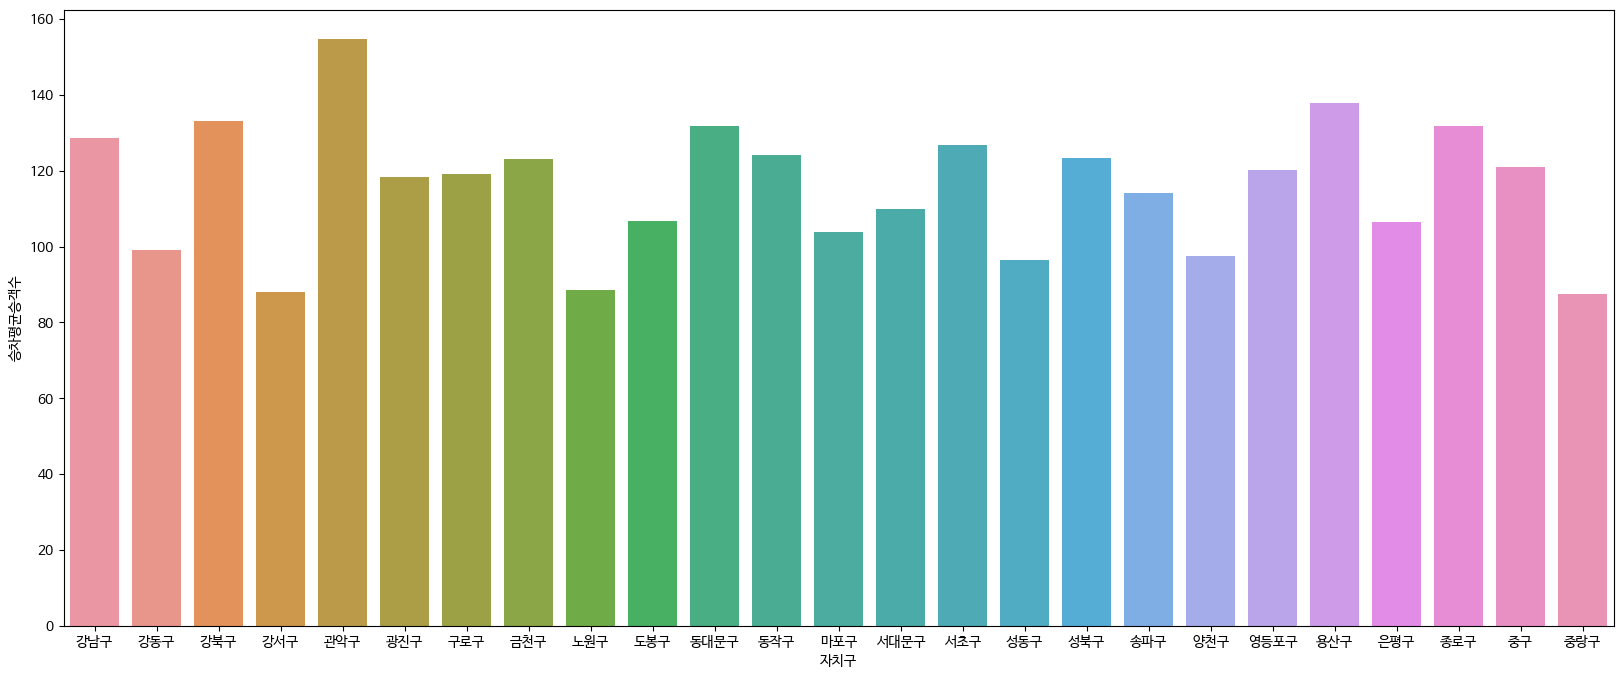

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='자치구', y='승차평균승객수', data=seoul_bus_station_summary)
plt.show()

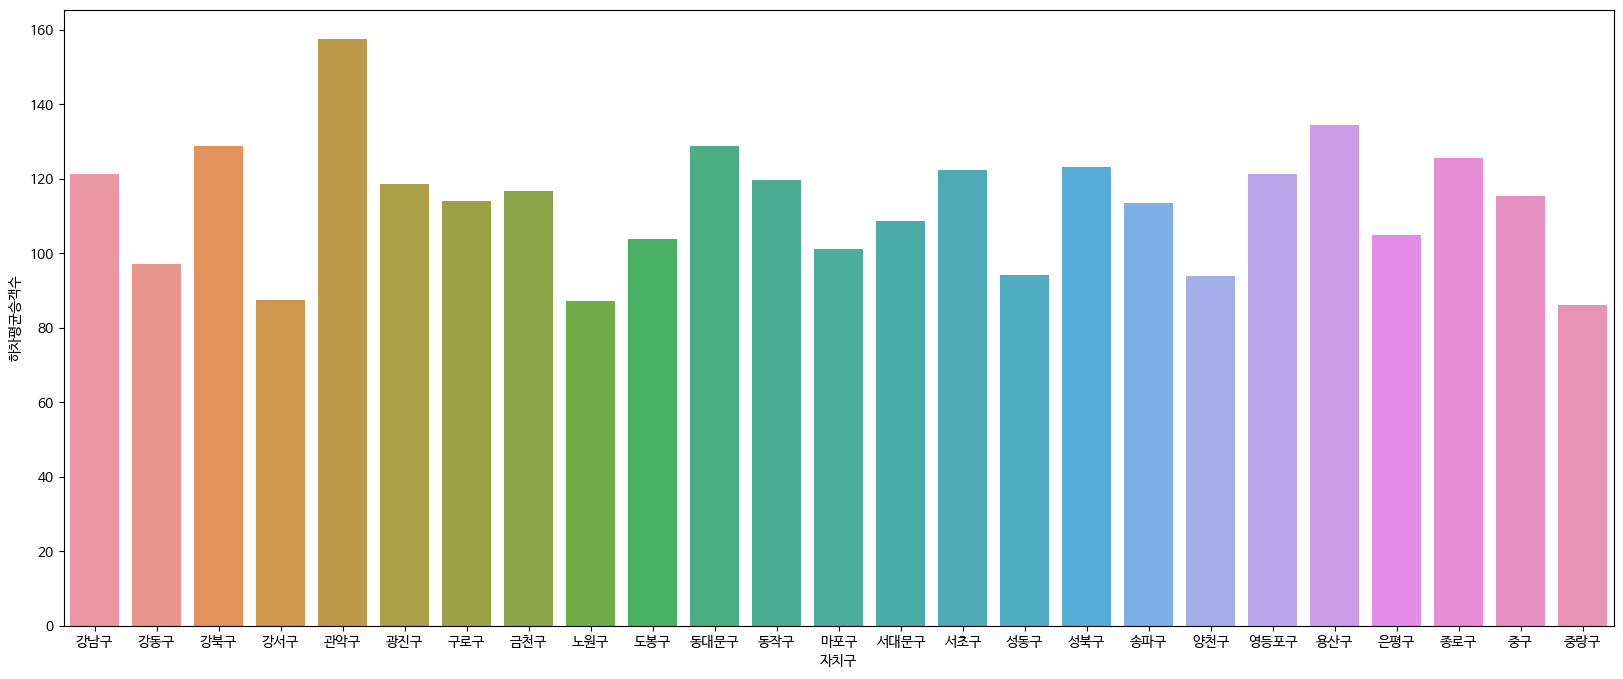

In [47]:
plt.figure(figsize=(20,8))
sns.barplot(x='자치구', y='하차평균승객수', data=seoul_bus_station_summary)
plt.show()

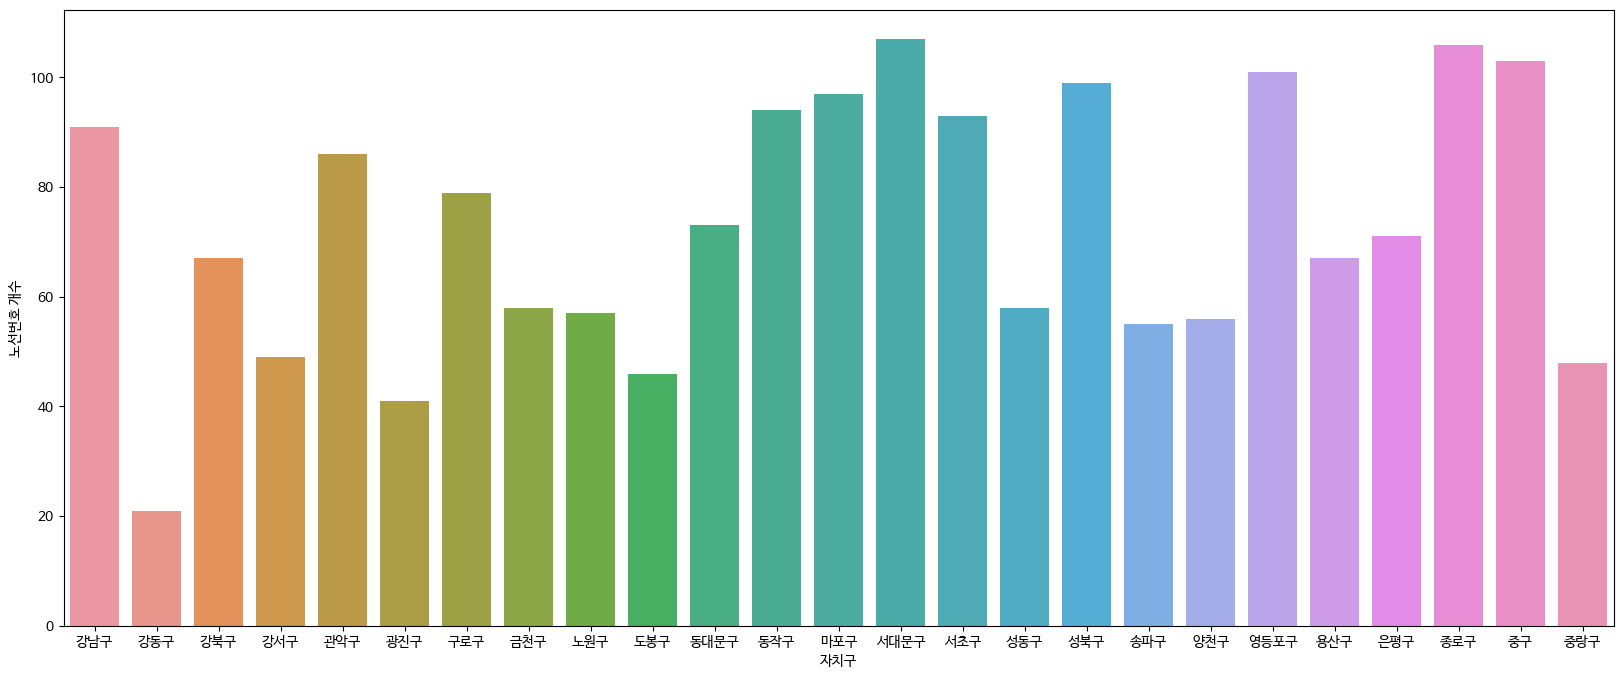

In [50]:
plt.figure(figsize=(20,8))
sns.barplot(x='자치구', y='노선번호 개수', data=seoul_bus_station_summary)
plt.show()

차트를 통해 알게 된 사실
1. 자치구 별 승하차 횟수에 큰 차이가 있음(관악구와 강서구, 노원구, 중랑구)
2. 서대문구, 종로구, 중구를 지나는 노선이 많음
3. 강동구를 지나는 노선은 현저하게 적음

- 자치구별 인구 밀도, 주요 버스 노선의 위치 등에 따라 차이가 날 수 있음
